In [2]:
import numpy as np
from numpy.random import choice as randI
from numpy.random import uniform as randU
from IPython.display import clear_output as clr_dis
import time
import matplotlib.pyplot as plt

In [3]:
ActionMap = ['Up', 'Right', 'Down', 'Left']
Move = {
    'R': 1,
    'L': 3,
    'U': 0,
    'D': 2
}

In [27]:
class FrozenLake:
    def __init__(self, N, M):
        L = int(np.sqrt(N))
        H = randI(N-2, M, replace=False) + 1
        
        self.board = np.ones((L,L))
        
        R = np.zeros((L, L))   
        for i in H:
            R[int(i/L)][int(i%L)] = -100
            self.board[int(i/L)][int(i%L)] = 0
        R[L-1][L-1] = 100
        self.board[0][0] = 80 + self.board[0][0]
        
        self.reward = R
        self.i = 0
        self.j = 0
        self.finish = 0
        self.L = L

    def reset(self):
        self.board[self.i][self.j] = self.board[self.i][self.j]%80
        self.i = 0
        self.j = 0
        self.finish = 0
        self.board[self.i][self.j] = self.board[self.i][self.j] + 80
        return 0
    
    def step(self, action):
        # ===== Action Table =========
        #     0 -- UP
        #     1 -- RIGHT
        #     2 -- DOWN
        #     3 -- LEFT
        self.board[self.i][self.j] = self.board[self.i][self.j]%80
        
        if action == 0:
            self.i -= 1
        elif action == 1:
            self.j += 1
        elif action == 2:
            self.i += 1
        elif action == 3:
            self.j -= 1
            
        state = self.L*(self.i) + self.j
        reward = self.reward[self.i][self.j]
        
        if state == (self.L*self.L - 1):
            self.finish = 1
        
        self.board[self.i][self.j] = self.board[self.i][self.j] + 80
            
        return state, reward, self.finish
    
    def get_random_action(self):
        if self.i == 0:
            if self.j == 0:
                return int(randI(2, 1) + 1)
            elif self.j == self.L-1:
                return int(randI(2, 1) + 2)
            else:
                return int(randI(3, 1) + 1)
        elif self.i == self.L-1:
            if self.j == 0:
                return int(randI(2, 1))
            elif self.j == self.L-1:
                return int(3*randI(2, 1))
            else:
                actions = [0, 1, 3]
                k = int(randI(3, 1))
                return actions[k]
        elif self.j == 0:
            return int(randI(3, 1))
        elif self.j == self.L-1:
            actions = [0, 2, 3]
            k = int(randI(3, 1))
            return actions[k]
        else:
            return int(randI(4, 1))
        
    def display(self):
        print(self.board)

In [164]:
N = int(input("Size: "))
M = int(input("Holes: "))

Size: 36
Holes: 12


In [165]:
env = FrozenLake(N, M)

In [166]:
env.display()

[[81.  0.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  0.  0.]
 [ 1.  1.  1.  1.  0.  1.]
 [ 0.  1.  0.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.]]


In [167]:
Q = np.zeros((N, 4))
L = int(np.sqrt(N))

for j in range(L):
    Q[j][0] = -1e8
    Q[L*(L-1) + j][2] = -1e8
    
for i in range(L):
    Q[L*i][3] = -1e8
    Q[L*i + L-1][1] = -1e8

In [168]:
total_episodes = 3000
alpha = 0.8
lambd = 0.8
max_steps = L*L*3

In [169]:
rewards = []

for episode in range(total_episodes):
    state = env.reset()
    total_rewards = 0
#     print(episode)
    for step in range(max_steps):
        exploit = randU(0,1)
        if exploit > np.exp(-episode*5e-4):
            action = np.argmax(Q[state,:])
        else:
            action = env.get_random_action()

        new_state, reward, finish = env.step(action)

        Q[state, action] = Q[state, action] + alpha*(reward + lambd*np.max(Q[new_state, :]) - Q[state, action])        
        total_rewards += reward
        state = new_state
        
#         print('Episode: ', episode, ' - step: ', step, ' - Total Reward', total_rewards)
        if finish == 1: 
            break

    rewards.append(total_rewards)


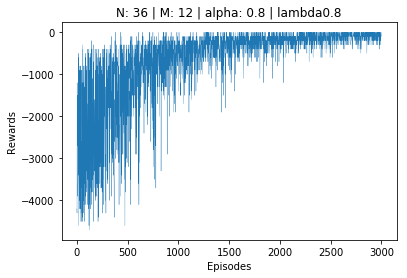

In [170]:
plt.plot(rewards, linewidth=0.3)
plt.ylabel('Rewards')
plt.xlabel('Episodes')
plt.title('N: ' + str(N) + ' | M: ' + str(M) + ' | alpha: ' + str(alpha) + ' | lambda' + str(lambd))
plt.savefig('output/' + str(N) + str(M) + str(alpha) + str(lambd) + '.png', dpi = 200)
# plt.close()

In [149]:
state = env.reset()
step = 0

while 1:
    step += 1
    action = np.argmax(Q[state,:])
    state, reward, finish = env.step(action)
    print('--------------------------------')
    print(' Action: ', ActionMap[action], ' | Step No.: ', step, ' ')
    print('--------------------------------')
    env.display()
    print()

    if finish:
        break
    if step > max_steps:
        print('Sorry No Solution Found!!')
        break

--------------------------------
 Action:  Right  | Step No.:  1  
--------------------------------
[[ 1. 81.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]

--------------------------------
 Action:  Right  | Step No.:  2  
--------------------------------
[[ 1.  1. 81.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0

In [60]:
alpha

0